In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import scipy.io

base_folder = '/content/drive/MyDrive/Thesis'

pose_folder = os.path.join(base_folder, 'shortpose')
spon_folder = os.path.join(base_folder, 'shortspon')

pose_data = {}
spon_data = {}

# load .mat files from folder
def load_mat_files(folder):
    data_dict = {}
    for file in os.listdir(folder):
        if file.endswith('.mat'):
            file_path = os.path.join(folder, file)
            mat_data = scipy.io.loadmat(file_path)
            data_dict[file] = mat_data
    return data_dict

pose_data = load_mat_files(pose_folder)
spon_data = load_mat_files(spon_folder)

print(f"Keys in 'pose' data: {list(pose_data.keys())}")
print(f"Keys in 'spon' data: {list(spon_data.keys())}")

Keys in 'pose' data: ['p129_pose__S  3_2.mat', 'p136_pose__S  3_2.mat', 'p128_pose__S  7_2.mat', 'p129_pose__S  6_2.mat', 'p128_pose__S  6_2.mat', 'p132_pose__S  3_2.mat', 'p129_pose__S  4_1.mat', 'p136_pose__S  4_2.mat', 'p129_pose__S  5_2.mat', 'p128_pose__S  4_1.mat', 'p132_pose__S  7_1.mat', 'p129_pose__S  3_1.mat', 'p136_pose__S  4_1.mat', 'p132_pose__S  2_1.mat', 'p135_pose__S  7_1.mat', 'p132_pose__S  4_1.mat', 'p128_pose__S  2_1.mat', 'p135_pose__S  6_2.mat', 'p128_pose__S  5_2.mat', 'p132_pose__S  5_1.mat', 'p132_pose__S  7_2.mat', 'p128_pose__S  4_2.mat', 'p135_pose__S  7_2.mat', 'p136_pose__S  6_2.mat', 'p135_pose__S  2_1.mat', 'p128_pose__S  2_2.mat', 'p136_pose__S  2_1.mat', 'p135_pose__S  4_1.mat', 'p135_pose__S  4_2.mat', 'p135_pose__S  6_1.mat', 'p128_pose__S  5_1.mat', 'p132_pose__S  3_1.mat', 'p136_pose__S  5_1.mat', 'p136_pose__S  2_2.mat', 'p136_pose__S  7_1.mat', 'p135_pose__S  3_1.mat', 'p136_pose__S  6_1.mat', 'p136_pose__S  7_2.mat', 'p129_pose__S  4_2.mat', 'p1

In [ ]:
example_file = 'p113_pose__S  2_2.mat'
if example_file in pose_data:
    print(f"Data in {example_file}:")
    print(pose_data[example_file])
else:
    print(f"'{example_file}' not found in pose_data.")

Data in p113_pose__S  2_2.mat:
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Feb 19 11:31:15 2024', '__version__': '1.0', '__globals__': [], 'chanlocs': array([[(array(['Fp1'], dtype='<U3'), array([], dtype='<U1'), array([[-19.33000794]]), array([[0.5249681]]), array([[83.9171]]), array([[29.4367]]), array([[-6.99]]), array([[19.33000794]]), array([[-4.49425846]]), array([[89.20459113]]), array([[1]], dtype=uint8), array(['average'], dtype='<U7')),
        (array(['Fz'], dtype='<U2'), array([], dtype='<U1'), array([[0.30570776]]), array([[0.22978077]]), array([[58.512]]), array([[-0.3122]]), array([[66.462]]), array([[-0.30570776]]), array([[48.63946073]]), array([[88.54913357]]), array([[2]], dtype=uint8), array(['average'], dtype='<U7')),
        (array(['F3'], dtype='<U2'), array([], dtype='<U1'), array([[-43.4108385]]), array([[0.33339452]]), array([[53.1112]]), array([[50.2438]]), array([[42.192]]), array([[43.4108385]]), array([[29.9889858]]), array([[8

In [ ]:
!pip install MNE
!pip install PyWavelets
!pip install pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.6 MB/s eta 0:00:00


In [ ]:
from scipy.io import loadmat

example_file = 'p113_pose__S  2_2.mat'
if example_file in pose_data:
    eeg_data = pose_data[example_file].get('data', None)
    if eeg_data is not None:
        print(f"EEG data shape: {eeg_data.shape}")
    else:
        print(f"EEG data not found in {example_file}")

mat_file_path = '/content/drive/MyDrive/Thesis/pose/p113_pose__S  2_2.mat'
mat_data = loadmat(mat_file_path)

# List all keys in the .mat file
print(mat_data.keys())

# Access the EEG data stored in the 'data' key
eeg_data = mat_data['data']

print(eeg_data.shape)
print(eeg_data)


EEG data shape: (32, 9030)
dict_keys(['__header__', '__version__', '__globals__', 'chanlocs', 'data', 'events', 'srate'])
(32, 9030)
[[ 1.20413752e+01  1.27936964e+01  1.15239925e+01 ...  3.66557732e+01
   3.73174095e+01  3.22357368e+01]
 [ 7.06962729e+00  5.24876499e+00  6.64696217e+00 ...  8.23778725e+00
   5.77559519e+00  5.30036163e+00]
 [ 2.07361069e+01  1.92191868e+01  1.49541759e+01 ... -1.09019871e+01
  -1.31806812e+01 -1.37456121e+01]
 ...
 [-1.65223873e+00 -2.10290909e+00  8.47052515e-01 ... -1.55296288e+01
  -1.21794224e+01 -1.53986454e+01]
 [-1.90519730e+02 -1.96162704e+02 -2.05355377e+02 ... -2.69026451e+01
  -1.15399303e+01 -2.67048950e+01]
 [ 1.77235031e+01  1.47585354e+01  1.35229235e+01 ...  1.06757246e-01
  -2.02346420e+00 -1.69603527e+00]]


In [ ]:
import pywt

print(pywt.wavelist())

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.signal import welch, detrend, butter, filtfilt
import pywt

# Configuration
srate = 256
f_low = 1
f_high = 50
spontaneous_dir = '/content/drive/MyDrive/Thesis/shortspon/'
posed_dir = '/content/drive/MyDrive/Thesis/shortpose/'

# Shannon entropy
def feat_ShannonEntropy(X):
    P = (X ** 2) / np.sum(X ** 2)
    P = P[P > 0]
    return -np.sum(P * np.log2(P))

# Bandpass filter for DE
def bandpass_filter(X, lowcut, highcut, fs):
    b, a = butter(4, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')
    return filtfilt(b, a, X)

# PSD + DE (DE = log(2πeσ²)/2 after bandpass)
def feat_PSDWelch_and_DE(X, srate, f_low, f_high):
    X = detrend(X)
    N = len(X)
    nfft = 2 ** int(np.ceil(np.log2(N)))
    f, pxx = welch(X, fs=srate, nperseg=srate, noverlap=srate // 2, nfft=nfft)
    pxx += 1e-12

    band_power_all = np.trapz(pxx[(f >= f_low) & (f <= f_high)], f[(f >= f_low) & (f <= f_high)])
    if band_power_all == 0:
        return [np.nan] * 5, [np.nan] * 5

    bands = [(1, 4), (4, 8), (8, 12), (12, 30), (30, 50)]
    rel_power, de_values = [], []

    for band in bands:
        idx = np.logical_and(f >= band[0], f < band[1])
        if np.any(idx):
            band_power = np.trapz(pxx[idx], f[idx])
            rel_power.append(band_power / band_power_all)
        else:
            rel_power.append(0)

        # calculate DE using standard formula
        try:
            X_band = bandpass_filter(X, band[0], band[1], srate)
            var = np.var(X_band)
            if var > 0:
                de = np.log(2 * np.pi * np.e * var) / 2
            else:
                de = np.nan
        except Exception:
            de = np.nan
        de_values.append(de)

    return rel_power, de_values

# Wavelet relative energy + entropy (db5)
def feat_WaveletEnergy_Entropy(X, wavelet='db5', level=None):
    coeffs = pywt.wavedec(X, wavelet, level=level)
    energies = [np.sum(np.square(c)) for c in coeffs]
    total_energy = np.sum(energies)
    if total_energy == 0:
        return [0] * len(energies), 0
    rel_energies = [e / total_energy for e in energies]
    we = -np.sum([p * np.log(p) for p in rel_energies if p > 0])
    return rel_energies, we

# Wavelet band energy (D5-D1 → delta to gamma)
def feat_WaveletBandEnergy(X, wavelet='db5', level=5):
    coeffs = pywt.wavedec(X, wavelet, level=level)
    energy = [np.sum(np.square(coeffs[i])) for i in range(1, 6)]  # D5 to D1
    total = np.sum(energy)
    return [e / total for e in energy] if total > 0 else [0] * 5

# Feature extraction
def run_feature_extraction(directory, label, srate, f_low, f_high):
    results = []

    for file in sorted(os.listdir(directory)):
        if not file.endswith('.mat'):
            continue

        filename = os.path.splitext(file)[0]
        filepath = os.path.join(directory, file)

        try:
            mat = loadmat(filepath)
            eeg_data = None
            for v in mat.values():
                if isinstance(v, np.ndarray) and v.ndim == 2 and v.shape[1] >= srate:
                    eeg_data = v
                    break
            if eeg_data is None:
                continue

            last_n_samples = srate * 20
            if eeg_data.shape[1] >= last_n_samples:
                eeg_data = eeg_data[:, -last_n_samples:]

            num_channels = eeg_data.shape[0]
            psd_features = np.zeros(5)
            de_features = np.zeros(5)
            wavelet_band_energy = np.zeros(5)
            wave_entropy_values = []
            shannon_features = []
            wave_energy_accum = None
            means, stds = [], []

            for ch in range(num_channels):
                X = eeg_data[ch, :]
                if np.all(np.abs(X) < 1e-6):
                    continue

                psd_val, de_val = feat_PSDWelch_and_DE(X, srate, f_low, f_high)
                rel_energy, we = feat_WaveletEnergy_Entropy(X)
                wave_band = feat_WaveletBandEnergy(X)

                if any(np.isnan(psd_val)) or any(np.isnan(de_val)):
                    continue

                psd_features += np.array(psd_val)
                de_features += np.array(de_val)
                wavelet_band_energy += np.array(wave_band)
                wave_entropy_values.append(we)
                shannon_features.append(feat_ShannonEntropy(X))
                means.append(np.mean(X))
                stds.append(np.std(X))

                if wave_energy_accum is None:
                    wave_energy_accum = np.array(rel_energy)
                else:
                    wave_energy_accum += np.array(rel_energy)

            if num_channels == 0 or len(shannon_features) == 0:
                continue

            psd_features /= num_channels
            de_features /= num_channels
            wavelet_band_energy /= num_channels
            wave_entropy_mean = np.mean(wave_entropy_values)
            shannon_mean = np.mean(shannon_features)
            wave_energy_accum /= num_channels

            features = [
                np.mean(means), np.mean(stds),
                *psd_features, *de_features,
                shannon_mean,
                wave_entropy_mean,
                *wavelet_band_energy
            ]
            row = [filename] + features + [label]
            results.append(row)

        except Exception as e:
            print(f"Error processing {filename}: {e}")
            continue

    columns = ['filename',
               'mean', 'std',
               'psd_delta', 'psd_theta', 'psd_alpha', 'psd_beta', 'psd_gamma',
               'de_delta', 'de_theta', 'de_alpha', 'de_beta', 'de_gamma',
               'shannon_entropy', 'wavelet_delta', 'wavelet_theta', 'wavelet_alpha', 'wavelet_beta', 'wavelet_gamma', 'wave_entropy', 'label']
    return pd.DataFrame(results, columns=columns)

spont_df = run_feature_extraction(spontaneous_dir, 'spontaneous', srate, f_low, f_high)
posed_df = run_feature_extraction(posed_dir, 'posed', srate, f_low, f_high)
final_df = pd.concat([spont_df, posed_df], ignore_index=True)
final_df = final_df.sort_values(by='filename').reset_index(drop=True)

output_path = 'final_features_dataset_pyml.csv'
if final_df.empty:
    print("No data to save.")
else:
    final_df.to_csv(output_path, index=False)
    print(f"Saved full feature dataset to: {output_path}")


<ipython-input-9-eeedee93940c>:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_power_all = np.trapz(pxx[(f >= f_low) & (f <= f_high)], f[(f >= f_low) & (f <= f_high)])
<ipython-input-9-eeedee93940c>:44: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_power = np.trapz(pxx[idx], f[idx])


Saved full feature dataset to: final_features_dataset_pyml.csv


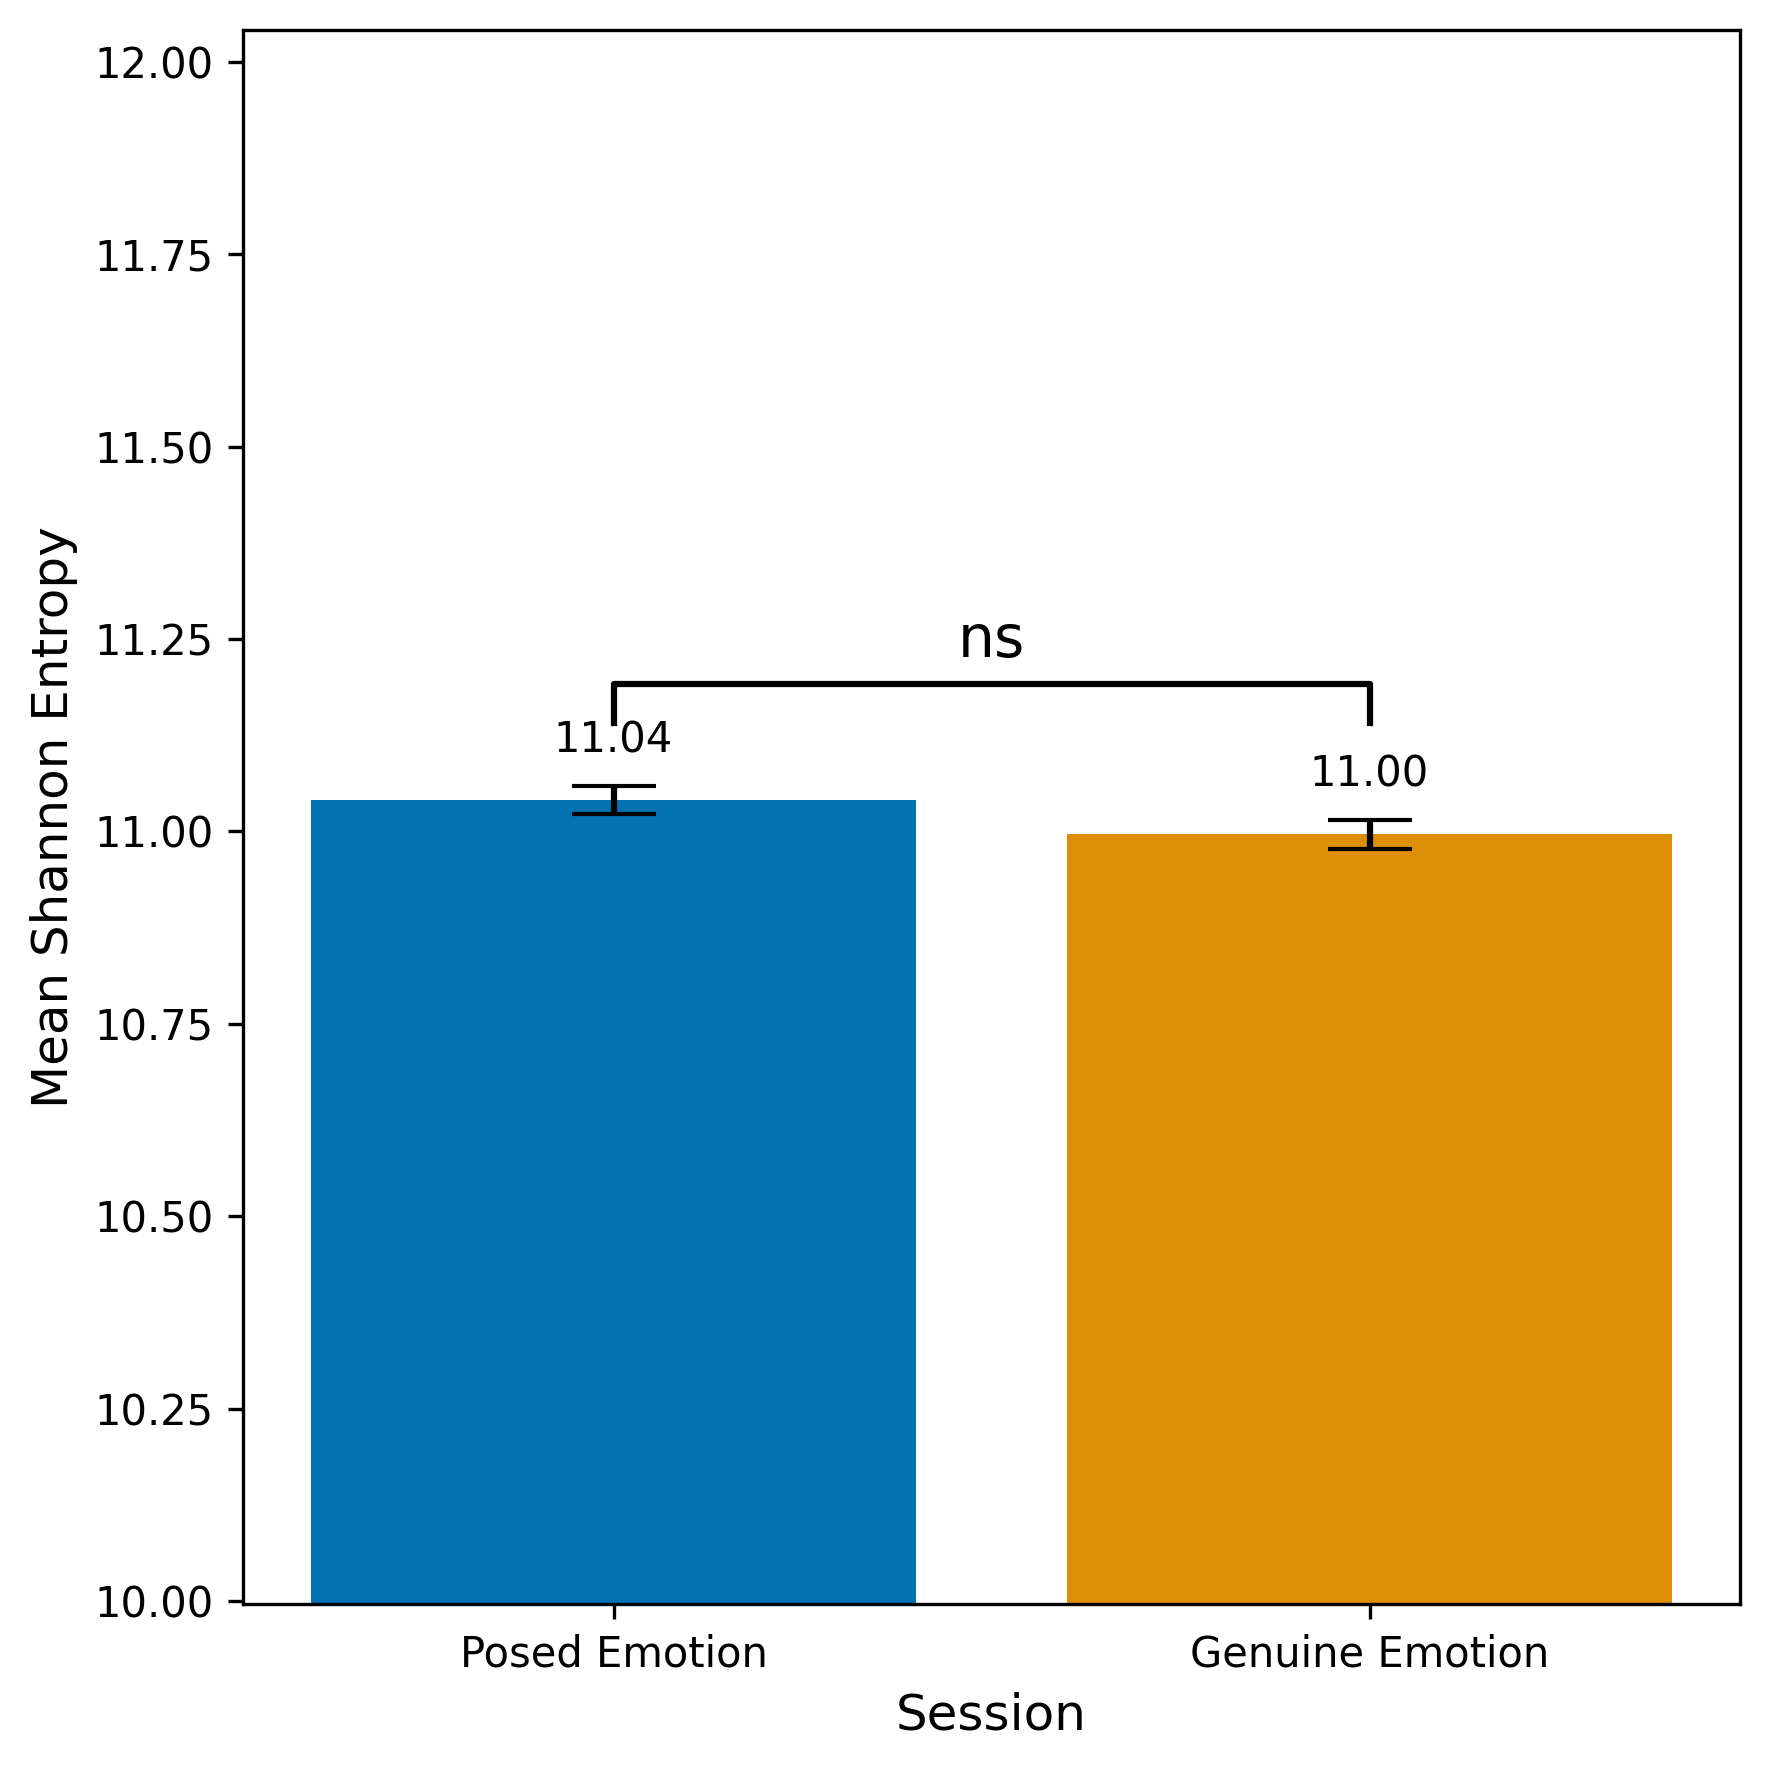

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import seaborn as sns

df = pd.read_csv('New_feature_extraction_SPSS.csv', sep=';')

means = [
    df['shannon_entropy_posed'].mean(),
    df['shannon_entropy_spontaneous'].mean()
]

sems = [
    df['shannon_entropy_posed'].std(ddof=1) / np.sqrt(len(df)),
    df['shannon_entropy_spontaneous'].std(ddof=1) / np.sqrt(len(df))
]

labels = ['Posed Emotion', 'Genuine Emotion']
colors = sns.color_palette("colorblind")[0:2]

fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

bars = ax.bar(labels, means, yerr=sems, capsize=10, color=colors)

ax.set_ylabel('Mean Shannon Entropy', fontsize=12)
ax.set_xlabel('Session', fontsize=12)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylim([min(means) - 1, max(means) + 1])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05, f'{yval:.2f}',
            ha='center', va='bottom', fontsize=10)


t_stat, p_val = ttest_rel(df['shannon_entropy_posed'], df['shannon_entropy_spontaneous'])


if p_val < 0.001:
    mark = "***"
elif p_val < 0.01:
    mark = "**"
elif p_val < 0.05:
    mark = "*"
else:
    mark = "ns"


x1, x2 = 0, 1
y, h, col = max(means) + 0.1, 0.05, 'black'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1 + x2) * 0.5, y + h + 0.02, mark, ha='center', va='bottom', color=col, fontsize=14)

plt.tight_layout()
plt.savefig('SE_with_stars.png', dpi=300)
plt.show()


<ipython-input-37-cef6ae5605ff>:47: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(
<ipython-input-37-cef6ae5605ff>:47: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax = sns.barplot(


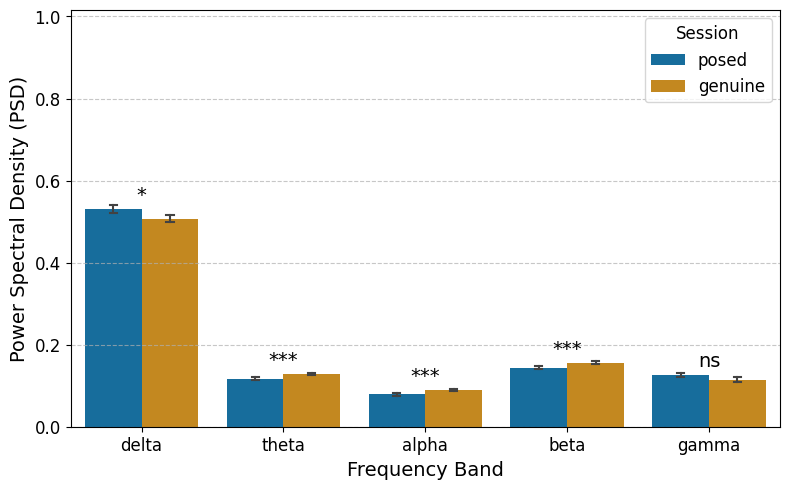

<ipython-input-37-cef6ae5605ff>:47: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(
<ipython-input-37-cef6ae5605ff>:47: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax = sns.barplot(


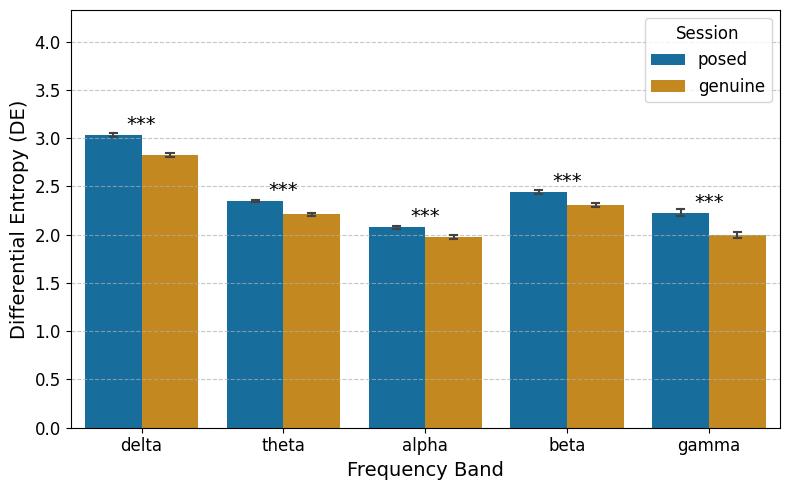

<ipython-input-37-cef6ae5605ff>:47: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(
<ipython-input-37-cef6ae5605ff>:47: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax = sns.barplot(


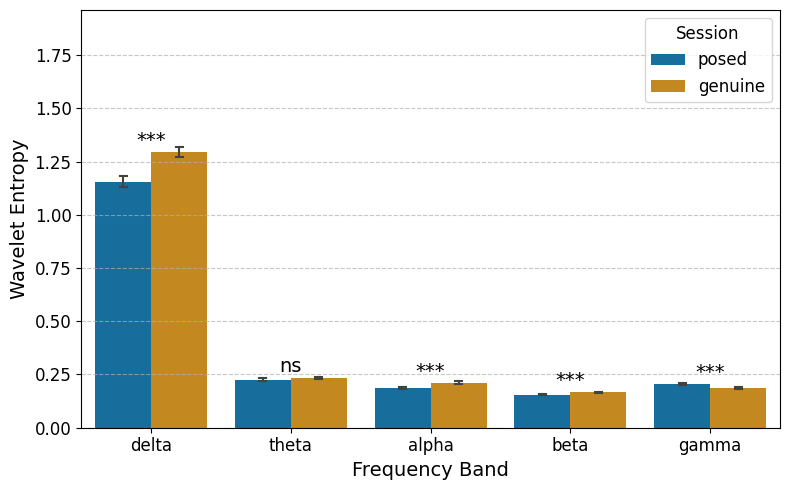

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


psd_val = {
    "delta": 0.013,
    "theta": 0.0009 ,
    "alpha": 0.0009 ,
    "beta": 0.0009 ,
    "gamma": 0.052
}

de_val = {
    "delta": 0.0009,
    "theta": 0.0009,
    "alpha": 0.0009,
    "beta": 0.0009,
    "gamma": 0.0009,
}

we_val = {
    "delta": 0.0009,
    "theta": 0.207,
    "alpha": 0.0009,
    "beta": 0.0009,
    "gamma": 0.0009
}

def get_sig_marker(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return "ns"

def plot_feature(df, value_col, feature_name, save_name, pval_dict):
    df = df.replace({"session": {"spontaneous": "genuine"}})
    df["session"] = pd.Categorical(df["session"], categories=["posed", "genuine"])

    palette = sns.color_palette("colorblind")

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=df,
        x="band", y=value_col, hue="session",
        errorbar='se', capsize=0.1, errwidth=1.5,
        palette=palette, dodge=True
    )

    plt.xlabel("Frequency Band", fontsize=14)
    plt.ylabel(feature_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.legend(title="Session", fontsize=12, title_fontsize=12, loc='upper right', frameon=True)


    bands = df['band'].unique()
    for i, band in enumerate(bands):
        p = pval_dict.get(band, 1.0)
        mark = get_sig_marker(p)
        if mark == '':
            continue


        posed_val = df[(df['band'] == band) & (df['session'] == 'posed')][value_col].mean()
        genuine_val = df[(df['band'] == band) & (df['session'] == 'genuine')][value_col].mean()
        max_val = max(posed_val, genuine_val)


        ax.text(i, max_val + 0.01, mark, ha='center', va='bottom', fontsize=14, color='black')

    ymax = df[value_col].max() + 0.1
    plt.ylim(top=ymax)

    plt.tight_layout()
    plt.savefig(f"{save_name}.png", dpi=300, bbox_inches='tight')
    plt.show()

plot_feature(psd_df, "psd_value", "Power Spectral Density (PSD)", "PSD", psd_val)
plot_feature(de_df, "de_value", "Differential Entropy (DE)", "DE",de_val)
plot_feature(we_df, "wavelet_entropy_value", "Wavelet Entropy", "WE", we_val)
